In [ ]:
!pip install pyarrow

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 116.9 MB/s eta 

In [ ]:
merged_df = pd.read_csv("./clean_taxi.csv")

# ***Machine Learning Model***

To train the final model to calculate the percentage busyness for passenger count at a certain drop-off location, I followed the following steps:

**Step 1:** Train a model to predict the number of passengers dropped off at a specific location on a specific day, time, week, and month.

**Step 2:** Use the predictions from the trained model in Step 1 to calculate the sum of the maximum passenger counts at a specific drop-off location on a specific day, time, week, and month based on the original dataset. This step involved grouping and aggregating the data to get the maximum passenger count for each group.

**Step 3: ** Create a new feature called 'busyness', which represents the percentage busyness, by dividing the predictions from Step 1 by the maximum passenger count calculated in Step 2 and then multiplying by 100. This step helps in calculating the percentage of how busy a drop-off location is compared to the maximum number of passengers it can accommodate.

**Step 4:** Train a new model using the target feature 'busyness' obtained in Step 3. This final model will be used to predict the percentage busyness for each drop-off location based on the passenger count.





In [ ]:
df = merged_df

In [ ]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,tpep_pickup_unix,tpep_dropoff_unix,dropoff_day_number,dropoff_hour,dropoff_month,drop_off_week_num
0,2019-05-06T16:08:07.000+01:00,2019-05-06T16:14:12.000+01:00,3,0.7,79,148,1557155287,1557155652,1,16,5,19
1,2019-05-06T16:21:51.000+01:00,2019-05-06T16:25:00.000+01:00,3,0.6,148,79,1557156111,1557156300,1,16,5,19
2,2019-05-06T16:47:40.000+01:00,2019-05-06T16:58:30.000+01:00,1,2.2,231,88,1557157660,1557158310,1,16,5,19
3,2019-05-06T16:09:10.000+01:00,2019-05-06T16:12:58.000+01:00,1,0.3,158,158,1557155350,1557155578,1,16,5,19
4,2019-05-06T16:20:05.000+01:00,2019-05-06T16:30:17.000+01:00,1,1.9,246,164,1557156005,1557156617,1,16,5,19


In [ ]:
df.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime", 'PULocationID', 'tpep_pickup_datetime',	'tpep_dropoff_datetime', 'trip_distance',"tpep_pickup_unix",	'tpep_dropoff_unix'], axis=1, inplace=True)


In [ ]:
df.head()

,passenger_count,DOLocationID,dropoff_day_number,dropoff_hour,dropoff_month,drop_off_week_num
0,3,148,1,16,5,19
1,3,79,1,16,5,19
2,1,88,1,16,5,19
3,1,158,1,16,5,19
4,1,164,1,16,5,19


In [ ]:
new_grouped = df.groupby(['DOLocationID', 'dropoff_day_number', 'dropoff_hour', 'dropoff_month'])['passenger_count'].sum().reset_index()

In [ ]:
new_grouped.head()

,DOLocationID,dropoff_day_number,dropoff_hour,dropoff_month,passenger_count
0,4,1,0,1,220
1,4,1,0,2,207
2,4,1,0,3,154
3,4,1,0,4,174
4,4,1,0,5,175


In [ ]:
max_passenger_count = new_grouped.groupby(['DOLocationID', 'dropoff_day_number', 'dropoff_hour', 'dropoff_month'] )['passenger_count'].max().reset_index()

In [ ]:
#new_grouped.groupby(['DOLocationID', 'dropoff_day_number'] )['passenger_count'].max().reset_index()

,DOLocationID,dropoff_day_number,passenger_count
0,4,1,521
1,4,2,630
2,4,3,697
3,4,4,749
4,4,5,945
...,...,...,...
464,263,3,3031
465,263,4,3252
466,263,5,3052
467,263,6,2913


In [ ]:
220/104

2.1153846153846154

## Model 1 prediction


In [ ]:
s1 = setup(new_grouped, target='passenger_count',
           fold=5,
           numeric_features=['DOLocationID', 'dropoff_hour', 'dropoff_day_number', 'dropoff_month'],
           session_id=125)

,Description,Value
0,Session id,125
1,Target,passenger_count
2,Target type,Regression
3,Original data shape,"(130973, 5)"
4,Transformed data shape,"(130973, 5)"
5,Transformed train set shape,"(91681, 5)"
6,Transformed test set shape,"(39292, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,82.5439,20505.6269,143.1788,0.9724,0.2896,0.3825,3.0920
et,Extra Trees Regressor,98.8816,27987.5748,167.2895,0.9623,0.4439,0.7702,3.8460
xgboost,Extreme Gradient Boosting,111.7534,29297.7912,171.0973,0.9606,0.8830,2.8019,0.6120
dt,Decision Tree Regressor,103.6469,34927.1660,186.8623,0.9530,0.3128,0.3142,0.0660
knn,K Neighbors Regressor,125.4335,46521.5360,215.6564,0.9374,0.4648,0.9528,0.0980
lightgbm,Light Gradient Boosting Machine,154.4419,53597.6695,231.4959,0.9278,0.9211,3.3419,0.2800
gbr,Gradient Boosting Regressor,310.5056,216992.3967,465.7561,0.7078,1.2645,8.3902,0.7080
ada,AdaBoost Regressor,613.6541,563341.8072,749.6769,0.2405,1.8626,27.5937,0.3060
br,Bayesian Ridge,578.0219,634193.2889,796.3287,0.1459,1.7652,21.8758,0.0260
en,Elastic Net,578.2780,634204.1829,796.3356,0.1459,1.7656,21.8925,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

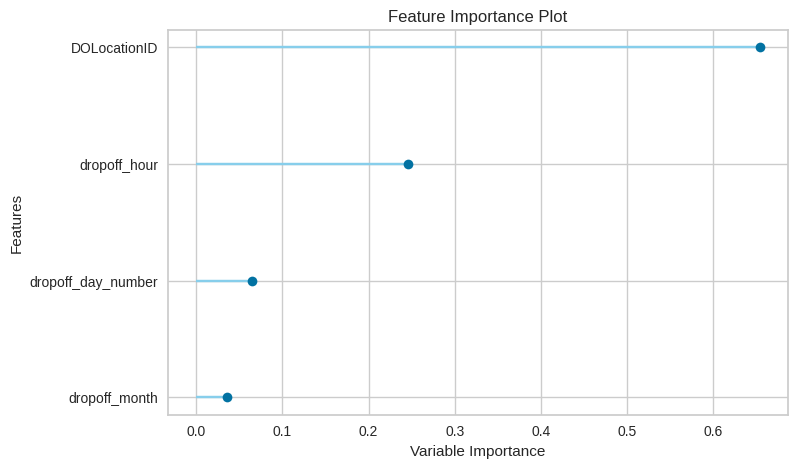

In [ ]:
plot_model(best, plot='feature')


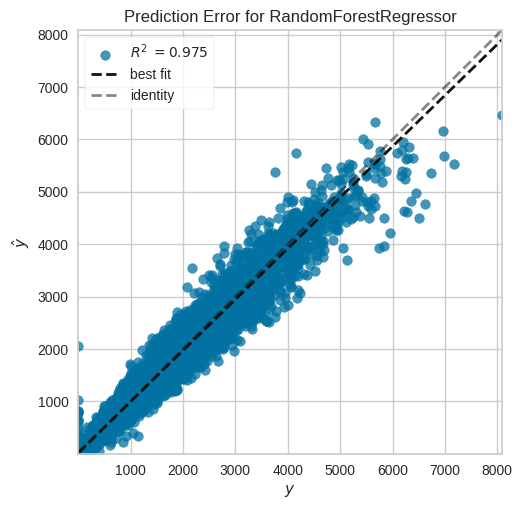

In [ ]:
plot_model(best, plot='error')


In [ ]:
dummy_data = [{
    'DOLocationID': 41,
    'dropoff_hour': 10,
    'dropoff_month': 7,
    'dropoff_day_number': 3
}            ]

# Convert the dictionary to a DataFrame
test_data_df = pd.DataFrame(dummy_data)

# Use the DataFrame to make predictions
predictions = predict_model(best, data=test_data_df)

print(predictions)


   DOLocationID  dropoff_hour  dropoff_month  dropoff_day_number  \
0            41            10              7                   3   

   prediction_label  
0            270.42  


In [ ]:
# A = new_grouped[(new_grouped['DOLocationID']== 41) & (new_grouped['dropoff_month']==7) & (new_grouped['dropoff_day_number']==3) & (new_grouped['dropoff_hour']==10)]['passenger_count']


In [ ]:
# B = predictions.prediction_label

In [ ]:
#RUN A QUERY AGAINST THE CURRENT DATA (NEW_GROUPED), GET THE PREDICTION, PRECITED OVER HISTORICAL MAX SUM

# B[0]/A[8742] * 100/1

93.55208333333334

### Conclusion

The issue with the model is that it can produce percentage busyness values over 100 percent. This occurs when the original model predicts a number of passengers dropped off at a specific location that is greater than the historical average or maximum passenger count observed for that location.

While it is possible for the original model to make predictions higher than the historical average, this leads to inflated percentage busyness values since the calculated 'busyness' feature is based on the ratio of the predicted passenger count to the historical maximum count.

When 'predicted_passenger_count' is greater than 'historical_maximum_passenger_count', the busyness will be greater than 100 percent.

One way I addressed  this issue was to clip the predicted passenger count to the historical maximum count. This means that if the original model predicts more passengers than the historical maximum. This ensures that the 'busyness' feature remains within a reasonable range (0 to 100 percent).




In [ ]:
predictions = predict_model(best, data=max_passenger_count)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,43.9201,7513.7610,86.6820,0.9900,0.1918,0.2196


In [ ]:
predictions['busyness'] = (predictions['prediction_label'] / predictions['passenger_count']) * 100

# Set an upper limit for 'busyness' (e.g., 100%)
upper_limit = 100

# Clip the 'busyness' values that exceed the upper limit
predictions['busyness'] = predictions['busyness'].apply(lambda x: min(x, upper_limit))

In [ ]:
max_passenger_count[max_passenger_count['DOLocationID']==12]

,DOLocationID,dropoff_day_number,dropoff_hour,dropoff_month,passenger_count
2016,12,1,0,1,2
2017,12,1,0,2,6
2018,12,1,0,3,6
2019,12,1,0,4,4
2020,12,1,0,5,4
...,...,...,...,...,...
4003,12,7,23,8,14
4004,12,7,23,9,11
4005,12,7,23,10,8
4006,12,7,23,11,9


In [ ]:
predictions

,DOLocationID,dropoff_day_number,dropoff_hour,dropoff_month,busyness
0,4,1,0,1,100.000000
1,4,1,0,2,98.763285
2,4,1,0,3,100.000000
3,4,1,0,4,100.000000
4,4,1,0,5,100.000000
...,...,...,...,...,...
130968,263,7,23,8,100.000000
130969,263,7,23,9,87.595506
130970,263,7,23,10,100.000000
130971,263,7,23,11,100.000000


In [ ]:
predictions =  predictions.drop(['passenger_count','prediction_label'],axis=1)

In [ ]:
location_ids = df['DOLocationID'].unique()
# Iterate through each location ID
for location_id in location_ids:
    print(location_id)
    # Create a subset of the data for the current location ID
    subset = predictions[predictions['DOLocationID'] == location_id]
    s = setup(subset, target='busyness',
              fold=5,
              numeric_features=['DOLocationID', 'dropoff_hour', 'dropoff_day_number', 'dropoff_month'],
              session_id=125,
              verbose=False)
    rf = create_model('rf')

        # Finalize the model
    final_rf = finalize_model(rf)

        # Save the model to a .pkl file
    save_model(final_rf, f'./drive/MyDrive/Models/taxi_model_DOLocationID_{location_id}')


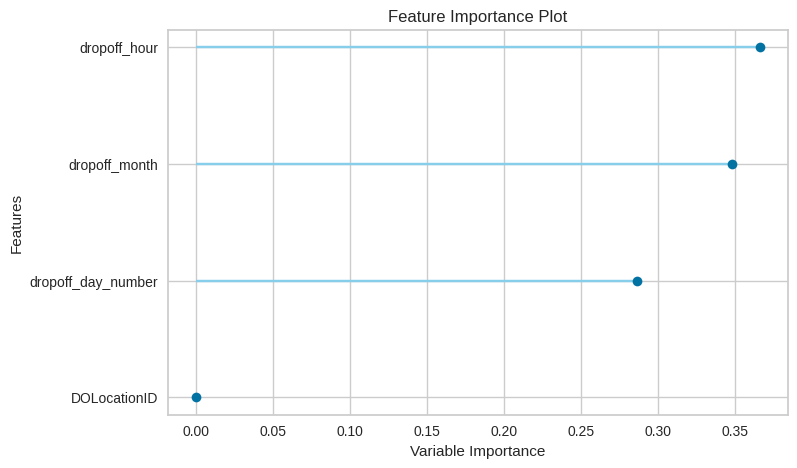

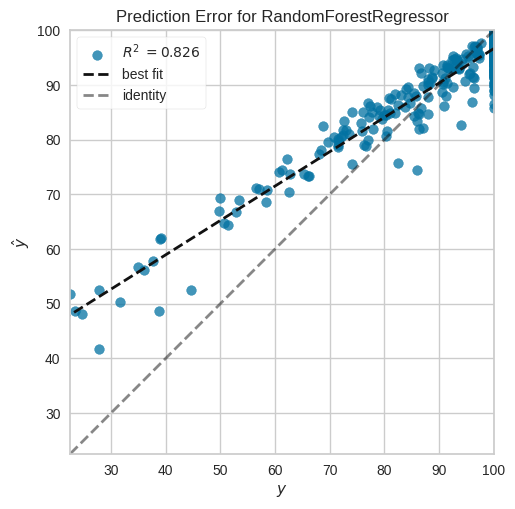

In [ ]:
plot_model(final_rf, plot='feature')

plot_model(final_rf, plot='error')
